In [295]:
!pip install Sastrawi
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [315]:
#import data and preprocessing
import pandas as pd
import matplotlib.pyplot as plt  

import random
import re
import string
import numpy as np

from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('indonesian')

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory=StemmerFactory()
stemmer=factory.create_stemmer()

#modelling
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

#evaluation metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [297]:
sentiment_df = pd.read_csv('https://raw.githubusercontent.com/hendrip8/Data-Fellowship-IYKRA/main/data_gabung.csv')
sentiment_df.head(2)

,Unnamed: 0,id,url,title,content,Label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",Bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",Bisnis


In [298]:
sentiment_df['content'] = [re.sub(r"b\S+","",stc) for stc in sentiment_df['content']]
sentiment_df.head(2)

,Unnamed: 0,id,url,title,content,Label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,JAKARTA -- Pemerintah optimistis sektor perta...,Bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,Wartawan Tri Yanuar Riezqi Yovanda TRIBUNNEWS...,Bisnis


In [299]:
sentiment_df.groupby('Label').count()

,Unnamed: 0,id,url,title,content
Label,,,,,
Bisnis,40,40,40,40,40
Lifestyle,40,40,40,40,40
Sport,40,40,40,40,40


In [300]:
sentiment_df.drop(['Unnamed: 0','id','url','title'], axis=1, inplace=True)

Bag of Words

In [301]:
cv = CountVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [302]:
random.seed(10)
np.random.seed(10) 
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['content'], sentiment_df['Label'], test_size=0.2)

In [303]:
X_train_vect=cv.fit_transform(X_train)
X_train_vect.toarray()
X_test_vect=cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [304]:
y_train=y_train.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})
y_test=y_test.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})

In [305]:
cv_df=pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names())
cv_df

,a,acara,aceh,aco,adat,adb,adelle,adellejewellery,adie,adies,adik,adjusment,administrasi,adult,adupi,agama,agen,agenda,agraria,agustus,ahli,ahy,ai,air,airlangga,ajang,aki,akrab,akses,aksesoris,aksi,aktivis,akui,akun,akurasi,al,alam,alamasri,alamat,alami,...,wireless,wisata,wiyanto,wna,wni,won,work,world,wsidodo,wujud,www,x,xa,xc,xe,xi,ya,yahng,yamaha,yan,yanuar,yard,yas,yasonna,yen,yoghurt,yogjakarta,young,youtu,yovanda,yuan,yuk,zainudin,zakat,zaman,zen,zodiak,zodiakmu,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0,0,22,3,3,11,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,8,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,10,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0


In [306]:
#modelling with svm kernel linear
np.random.seed(10) 
random.seed(10)
SVM1 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM1.fit(X_train_vect, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [307]:
predicted1 = SVM1.predict(X_test_vect)

In [309]:
accuracy_score(y_test, predicted1)

0.9166666666666666

In [310]:
print(classification_report(y_test, predicted1))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91        10
           3       1.00      0.86      0.92         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.92        24
weighted avg       0.93      0.92      0.92        24



In [311]:
print(confusion_matrix(y_test, predicted1))

[[ 6  1  0]
 [ 0 10  0]
 [ 0  1  6]]


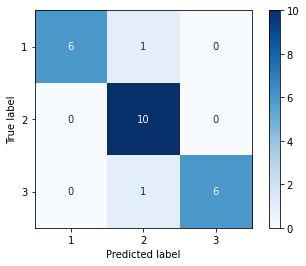

In [320]:
plot_confusion_matrix(SVM1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [182]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
predictedlr = lr.predict(X_test_vect)

In [184]:
accuracy_score(y_test, predictedlr)

0.9166666666666666

In [185]:
print(classification_report(y_test, predictedlr))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91        10
           3       1.00      0.86      0.92         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.92        24
weighted avg       0.93      0.92      0.92        24



In [186]:
print(confusion_matrix(y_test, predictedlr))

[[ 6  1  0]
 [ 0 10  0]
 [ 0  1  6]]


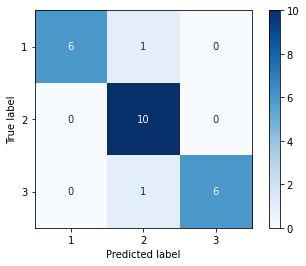

In [321]:
plot_confusion_matrix(lr,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [188]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb = naive_bayes.MultinomialNB()
nb.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [189]:
predictednb = nb.predict(X_test_vect)

In [190]:
accuracy_score(y_test, predictednb)

1.0

In [191]:
print(classification_report(y_test, predictednb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [192]:
print(confusion_matrix(y_test, predictednb))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


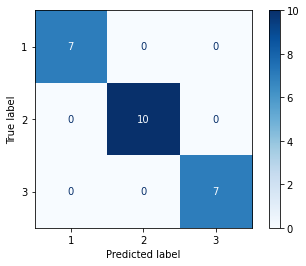

In [322]:
plot_confusion_matrix(nb,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [193]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [194]:
predictedrf = rf.predict(X_test_vect)

In [195]:
accuracy_score(y_test, predictedrf)

0.9583333333333334

In [196]:
print(classification_report(y_test, predictedrf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [197]:
print(confusion_matrix(y_test, predictedrf))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


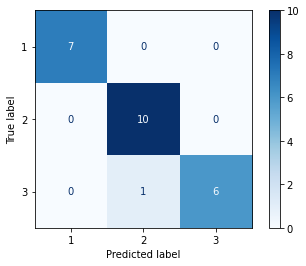

In [323]:
plot_confusion_matrix(rf,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

TF-IDF

In [198]:
tf = TfidfVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [199]:
X_train_vect1=tf.fit_transform(X_train)
X_train_vect1.toarray()
X_test_vect1=tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [200]:
tf_df=pd.DataFrame(X_train_vect1.toarray(), columns=tf.get_feature_names())
tf_df

,a,acara,aceh,aco,adat,adb,adelle,adellejewellery,adie,adies,adik,adjusment,administrasi,adult,adupi,agama,agen,agenda,agraria,agustus,ahli,ahy,ai,air,airlangga,ajang,aki,akrab,akses,aksesoris,aksi,aktivis,akui,akun,akurasi,al,alam,alamasri,alamat,alami,...,wireless,wisata,wiyanto,wna,wni,won,work,world,wsidodo,wujud,www,x,xa,xc,xe,xi,ya,yahng,yamaha,yan,yanuar,yard,yas,yasonna,yen,yoghurt,yogjakarta,young,youtu,yovanda,yuan,yuk,zainudin,zakat,zaman,zen,zodiak,zodiakmu,zona,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.047054,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.051316,0.0,0.0,0.0,0.0,0.000000,0.046410,0.020932,0.020932,0.023205,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.051316,0.0,0.0,0.0,0.000000,0.000000,0.051316,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.065714,0.0,0.0,0.000000,0.0,0.0,0.055538,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.106549,0.000000,0.029233,0.029233,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172373,0.0,0.0,0.0,0.0,0.000000,0.280036,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.079028,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035156,0.035156,0.000000,0.0,0.0,0.0,0.000000,0.0,0.064068,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.079028,0.064068,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.063635,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.337440,0.337440,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.023942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.079265,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.042355,0.071592,0.000000,0.0,0.0,0.0,0.0,0.000000,0.459525,0.056525,0.056525,0.229763,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.15853,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.033074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071336,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071336,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
92,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.075489,0.136188,0.136188,0.037744,0.0,0

In [201]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM11 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM11.fit(X_train_vect1, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [202]:
predicted11 = SVM11.predict(X_test_vect1)

In [203]:
accuracy_score(y_test, predicted11)

1.0

In [204]:
print(classification_report(y_test, predicted11))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [205]:
print(classification_report(y_test, predicted11))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



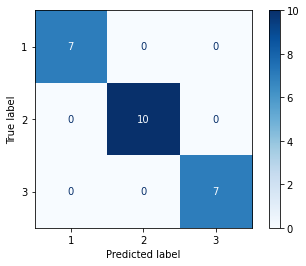

In [324]:
plot_confusion_matrix(SVM11,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [207]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr1.fit(X_train_vect1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
predictedlr1 = lr1.predict(X_test_vect1)

In [209]:
accuracy_score(y_test, predictedlr1)

0.9583333333333334

In [210]:
print(classification_report(y_test, predictedlr1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [211]:
print(confusion_matrix(y_test, predictedlr1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


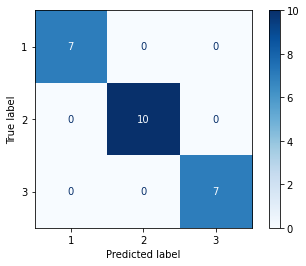

In [327]:
plot_confusion_matrix(lr1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [212]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb1 = naive_bayes.MultinomialNB()
nb1.fit(X_train_vect1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [213]:
predictednb1 = nb1.predict(X_test_vect1)

In [214]:
accuracy_score(y_test, predictednb1)

1.0

In [215]:
print(classification_report(y_test, predictednb1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [216]:
print(confusion_matrix(y_test, predictednb1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


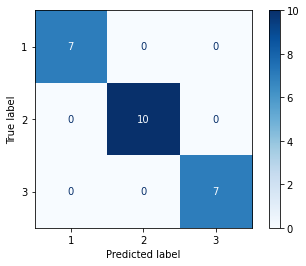

In [328]:
plot_confusion_matrix(nb1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [217]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train_vect1, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [218]:
predictedrf1 = rf1.predict(X_test_vect1)

In [281]:
predictedrf1

array([2, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 3,
       1, 1])

In [219]:
accuracy_score(y_test, predictedrf1)

0.9583333333333334

In [220]:
print(classification_report(y_test, predictedrf1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [221]:
print(confusion_matrix(y_test, predictedrf1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


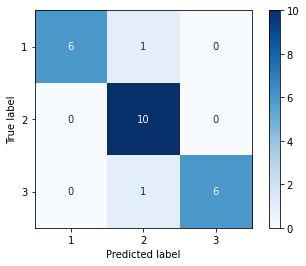

In [326]:
plot_confusion_matrix(rf1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

Preprocessing Manual

In [222]:
#preprocessing function
def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = sentence.split()
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    
    #stemming
    words = [stemmer.stem(w) for w in words]
    
    #remove stopwords
    words = [x for x in words if x not in stop_words ]
    
    
    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [223]:
sentiment_df2 = sentiment_df

In [224]:
sentiment_df2['content'] = [preprocessing(stc) for stc in sentiment_df2['content']]
sentiment_df2['content']

0      jakarta perintah optimistis sektor tani sangga...
1      wartawan yanuar riezqi yovanda tribunnewscom j...
2      masyarakat indonesia nikmat token listrik grat...
3      jakarta xc2xa0 perintah resmi kesah omni ranca...
4      wartawan yanuar riezqi yovanda tribunnewscom j...
                             ...                        
115    ajang balap motogp 2020 gelar pekan minggu 111...
116    ajang balap motogp 2020 gelar pekan minggu 111...
117    ajang balap motogp 2020 gelar pekan minggu 111...
118    ajang balap motogp 2020 gelar pekan minggu 111...
119    ajang balap motogp 2020 gelar pekan minggu 111...
Name: content, Length: 120, dtype: object

In [285]:
from nltk.tokenize import word_tokenize
import itertools

import nltk
nltk.download('punkt')

before = [word_tokenize(text) for text in sentiment_df['content']]
iter_before = list(itertools.chain(*before))
after = [word_tokenize(text) for text in sentiment_df2['content']]
iter_after = list(itertools.chain(*after))
print('before pre-processing   :', len(iter_before))
print('after pre-processing    :', len(iter_after))
print('delete                  :', (len(iter_before))-(len(iter_after)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
before pre-processing   : 26072
after pre-processing    : 11555
delete                  : 14517


In [225]:
np.random.seed(10)
random.seed(10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(sentiment_df2['content'], sentiment_df2['Label'], test_size=0.2)

Bag of Words

In [226]:
cv1 = CountVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [227]:
X_train_vect2=cv1.fit_transform(X_train2)
X_train_vect2.toarray()
X_test_vect2=cv1.transform(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [228]:
y_train2=y_train2.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})
y_test2=y_test2.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})

In [229]:
cv_df2=pd.DataFrame(X_train_vect2.toarray(), columns=cv1.get_feature_names())
cv_df2

,acara,aceh,acu,adat,adaxc,adelle,adellejewellery,adellexe,adie,adies,adik,adjusmentxe,administrasi,adupi,agama,agen,agenagen,agenda,agraria,agustus,ahli,airlangga,airxe,ajang,ajar,aju,akhirakhir,akomodasi,akrab,akses,aksesoris,aksi,aktivis,akun,akurasi,alam,alamasri,alamat,alami,alas,...,white,whiteningxe,widodo,wilayah,wilson,windows,winwin,wireless,wisata,wiyanto,work,world,wsidodo,wujud,wwwplncoid,wwwrelxnowcoid,x,xa,xc,xe,yahng,yaknixc,yamaha,yangxc,yanuar,yard,yasonna,yasonnaxc,yoghurt,yogjakarta,youngadult,youtu,yovanda,yuan,zainudin,zakat,zaman,zodiak,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,3,2,7,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [230]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM21 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM21.fit(X_train_vect2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [231]:
predicted21 = SVM21.predict(X_test_vect2)

In [232]:
accuracy_score(y_test2, predicted21)

1.0

In [233]:
print(classification_report(y_test2, predicted21))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [234]:
print(confusion_matrix(y_test2, predicted21))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


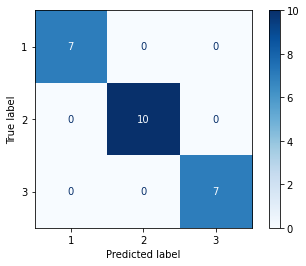

In [330]:
plot_confusion_matrix(SVM21,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [235]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr2.fit(X_train_vect2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
predictedlr2 = lr2.predict(X_test_vect2)

In [237]:
accuracy_score(y_test2, predictedlr2)

1.0

In [238]:
print(classification_report(y_test2, predictedlr2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [239]:
print(confusion_matrix(y_test2, predictedlr2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


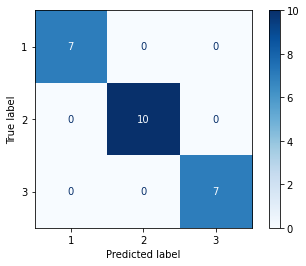

In [331]:
plot_confusion_matrix(lr2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [240]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb2 = naive_bayes.MultinomialNB()
nb2.fit(X_train_vect2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [241]:
predictednb2 = nb2.predict(X_test_vect2)

In [242]:
accuracy_score(y_test2, predictednb2)

1.0

In [243]:
print(classification_report(y_test2, predictednb2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [244]:
print(confusion_matrix(y_test2, predictednb2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


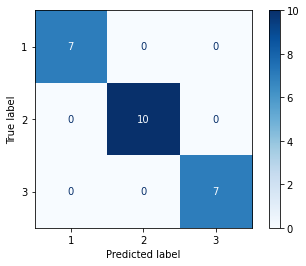

In [332]:
plot_confusion_matrix(nb2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [245]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(X_train_vect2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [246]:
predictedrf2 = rf2.predict(X_test_vect2)

In [247]:
accuracy_score(y_test2, predictedrf2)

0.9583333333333334

In [248]:
print(classification_report(y_test2, predictedrf2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [249]:
print(confusion_matrix(y_test2, predictedrf2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


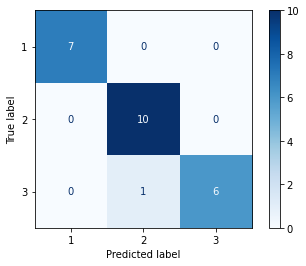

In [333]:
plot_confusion_matrix(rf2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

TF-IDF

In [250]:
tf1 = TfidfVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [251]:
X_train_vect12=tf1.fit_transform(X_train2)
X_train_vect12.toarray()
X_test_vect12=tf1.transform(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [252]:
tf_df2=pd.DataFrame(X_train_vect2.toarray(), columns=tf1.get_feature_names())
tf_df2

,acara,aceh,acu,adat,adaxc,adelle,adellejewellery,adellexe,adie,adies,adik,adjusmentxe,administrasi,adupi,agama,agen,agenagen,agenda,agraria,agustus,ahli,airlangga,airxe,ajang,ajar,aju,akhirakhir,akomodasi,akrab,akses,aksesoris,aksi,aktivis,akun,akurasi,alam,alamasri,alamat,alami,alas,...,white,whiteningxe,widodo,wilayah,wilson,windows,winwin,wireless,wisata,wiyanto,work,world,wsidodo,wujud,wwwplncoid,wwwrelxnowcoid,x,xa,xc,xe,yahng,yaknixc,yamaha,yangxc,yanuar,yard,yasonna,yasonnaxc,yoghurt,yogjakarta,youngadult,youtu,yovanda,yuan,zainudin,zakat,zaman,zodiak,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,3,2,7,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [253]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM112 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM112.fit(X_train_vect12, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [254]:
predicted112 = SVM112.predict(X_test_vect12)

In [255]:
accuracy_score(y_test2, predicted112)

1.0

In [256]:
print(classification_report(y_test2, predicted112))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [257]:
print(confusion_matrix(y_test2, predicted112))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


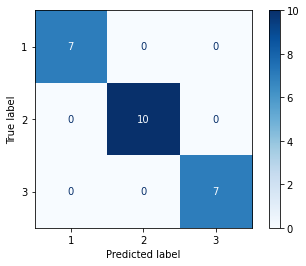

In [334]:
plot_confusion_matrix(SVM112,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [258]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr12 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr12.fit(X_train_vect12, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [259]:
predictedlr12 = lr12.predict(X_test_vect12)

In [260]:
accuracy_score(y_test2, predictedlr12)

1.0

In [261]:
print(classification_report(y_test2, predictedlr12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [262]:
print(confusion_matrix(y_test2, predictedlr12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


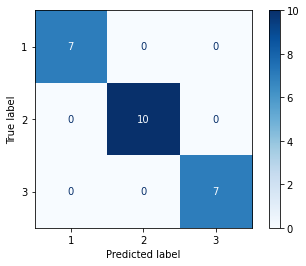

In [335]:
plot_confusion_matrix(lr12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [336]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb12 = naive_bayes.MultinomialNB()
nb12.fit(X_train_vect12, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [337]:
predictednb12 = nb12.predict(X_test_vect12)

In [338]:
accuracy_score(y_test2, predictednb12)

1.0

In [339]:
print(classification_report(y_test2, predictednb12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [340]:
print(confusion_matrix(y_test2, predictednb12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


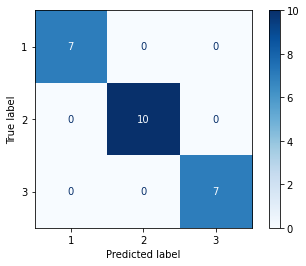

In [341]:
plot_confusion_matrix(nb12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [268]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf12 = RandomForestClassifier(random_state=0)
rf12.fit(X_train_vect12, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [269]:
predictedrf12 = rf12.predict(X_test_vect12)

In [270]:
accuracy_score(y_test2, predictedrf12)

0.9583333333333334

In [271]:
print(classification_report(y_test2, predictedrf12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [272]:
print(confusion_matrix(y_test2, predictedrf12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


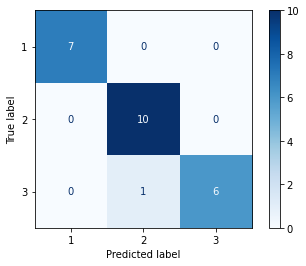

In [342]:
plot_confusion_matrix(rf12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()